# Data Science Final Project Presentation - The Hound of Baskervilles

![SegmentLocal](images/sherlock1.gif "segment")

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramesh0101/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
fr= open('Sherlock.txt', encoding="utf8")
data = fr.read()
data

'Chapter 1.\n\nMr. Sherlock Holmes\n\n      Mr. Sherlock Holmes, who was usually very late in the mornings,\n      save upon those not infrequent occasions when he was up all\n      night, was seated at the breakfast table. I stood upon the\n      hearth-rug and picked up the stick which our visitor had left\n      behind him the night before. It was a fine, thick piece of wood,\n      bulbous-headed, of the sort which is known as a “Penang lawyer.”\n      Just under the head was a broad silver band nearly an inch\n      across. “To James Mortimer, M.R.C.S., from his friends of the\n      C.C.H.,” was engraved upon it, with the date “1884.” It was just\n      such a stick as the old-fashioned family practitioner used to\n      carry—dignified, solid, and reassuring.\n\n      “Well, Watson, what do you make of it?”\n\n      Holmes was sitting with his back to me, and I had given him no\n      sign of my occupation.\n\n      “How did you know what I was doing? I believe you have eyes in\

In [5]:
len(data)

353207

In [6]:
data = re.sub('[^a-zA-Z]', ' ', data)
data = data.lower()

In [7]:
data

'chapter     mr  sherlock holmes        mr  sherlock holmes  who was usually very late in the mornings        save upon those not infrequent occasions when he was up all       night  was seated at the breakfast table  i stood upon the       hearth rug and picked up the stick which our visitor had left       behind him the night before  it was a fine  thick piece of wood        bulbous headed  of the sort which is known as a  penang lawyer         just under the head was a broad silver band nearly an inch       across   to james mortimer  m r c s   from his friends of the       c c h    was engraved upon it  with the date         it was just       such a stick as the old fashioned family practitioner used to       carry dignified  solid  and reassuring          well  watson  what do you make of it          holmes was sitting with his back to me  and i had given him no       sign of my occupation          how did you know what i was doing  i believe you have eyes in       the back of you

In [8]:
from nltk.tokenize import word_tokenize
tokened_data =word_tokenize(data)

In [9]:
tokened_data

['chapter',
 'mr',
 'sherlock',
 'holmes',
 'mr',
 'sherlock',
 'holmes',
 'who',
 'was',
 'usually',
 'very',
 'late',
 'in',
 'the',
 'mornings',
 'save',
 'upon',
 'those',
 'not',
 'infrequent',
 'occasions',
 'when',
 'he',
 'was',
 'up',
 'all',
 'night',
 'was',
 'seated',
 'at',
 'the',
 'breakfast',
 'table',
 'i',
 'stood',
 'upon',
 'the',
 'hearth',
 'rug',
 'and',
 'picked',
 'up',
 'the',
 'stick',
 'which',
 'our',
 'visitor',
 'had',
 'left',
 'behind',
 'him',
 'the',
 'night',
 'before',
 'it',
 'was',
 'a',
 'fine',
 'thick',
 'piece',
 'of',
 'wood',
 'bulbous',
 'headed',
 'of',
 'the',
 'sort',
 'which',
 'is',
 'known',
 'as',
 'a',
 'penang',
 'lawyer',
 'just',
 'under',
 'the',
 'head',
 'was',
 'a',
 'broad',
 'silver',
 'band',
 'nearly',
 'an',
 'inch',
 'across',
 'to',
 'james',
 'mortimer',
 'm',
 'r',
 'c',
 's',
 'from',
 'his',
 'friends',
 'of',
 'the',
 'c',
 'c',
 'h',
 'was',
 'engraved',
 'upon',
 'it',
 'with',
 'the',
 'date',
 'it',
 'was',
 '

In [10]:
stopWords = set(stopwords.words('english'))
stopWords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
filtered_list= []
for word in tokened_data:
    if word not in stopWords:
        filtered_list.append(word)
filtered_list

['chapter',
 'mr',
 'sherlock',
 'holmes',
 'mr',
 'sherlock',
 'holmes',
 'usually',
 'late',
 'mornings',
 'save',
 'upon',
 'infrequent',
 'occasions',
 'night',
 'seated',
 'breakfast',
 'table',
 'stood',
 'upon',
 'hearth',
 'rug',
 'picked',
 'stick',
 'visitor',
 'left',
 'behind',
 'night',
 'fine',
 'thick',
 'piece',
 'wood',
 'bulbous',
 'headed',
 'sort',
 'known',
 'penang',
 'lawyer',
 'head',
 'broad',
 'silver',
 'band',
 'nearly',
 'inch',
 'across',
 'james',
 'mortimer',
 'r',
 'c',
 'friends',
 'c',
 'c',
 'h',
 'engraved',
 'upon',
 'date',
 'stick',
 'old',
 'fashioned',
 'family',
 'practitioner',
 'used',
 'carry',
 'dignified',
 'solid',
 'reassuring',
 'well',
 'watson',
 'make',
 'holmes',
 'sitting',
 'back',
 'given',
 'sign',
 'occupation',
 'know',
 'believe',
 'eyes',
 'back',
 'head',
 'least',
 'well',
 'polished',
 'silver',
 'plated',
 'coffee',
 'pot',
 'front',
 'said',
 'tell',
 'watson',
 'make',
 'visitor',
 'stick',
 'since',
 'unfortunate',
 

In [12]:
fdist = nltk.FreqDist(filtered_list)
fdist 

FreqDist({'sir': 350, 'upon': 314, 'one': 247, 'said': 240, 'man': 213, 'could': 201, 'holmes': 193, 'would': 193, 'us': 182, 'moor': 163, ...})

In [13]:
fdist.most_common(30)

[('sir', 350),
 ('upon', 314),
 ('one', 247),
 ('said', 240),
 ('man', 213),
 ('could', 201),
 ('holmes', 193),
 ('would', 193),
 ('us', 182),
 ('moor', 163),
 ('henry', 156),
 ('know', 118),
 ('watson', 114),
 ('baskerville', 114),
 ('see', 113),
 ('well', 111),
 ('dr', 107),
 ('may', 102),
 ('charles', 94),
 ('stapleton', 93),
 ('mortimer', 90),
 ('think', 90),
 ('come', 88),
 ('might', 88),
 ('must', 87),
 ('time', 86),
 ('two', 80),
 ('much', 77),
 ('face', 77),
 ('last', 74)]

In [14]:
len(fdist)

5399

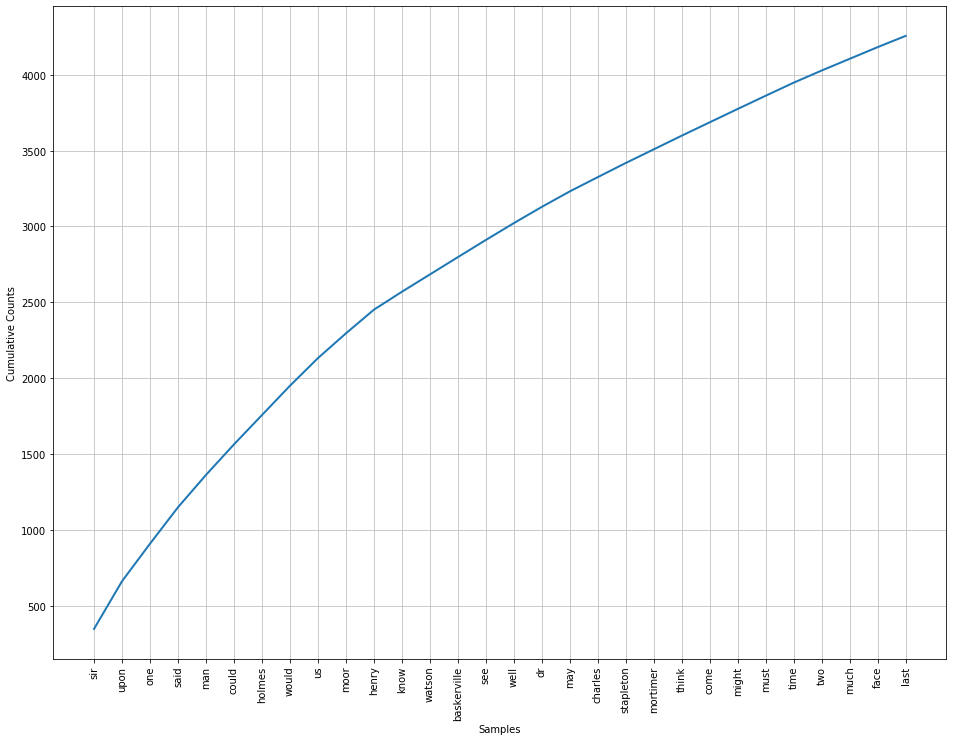

In [15]:
fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot(30, cumulative=True)

In [16]:
len(data)

353207

In [97]:
len(filtered_list)

26660

In [18]:
 ps = PorterStemmer()

In [19]:

data1 = [ps.stem(word) for word in filtered_list]
data1 = ' '.join(data1)

In [20]:
data1

'chapter mr sherlock holm mr sherlock holm usual late morn save upon infrequ occas night seat breakfast tabl stood upon hearth rug pick stick visitor left behind night fine thick piec wood bulbou head sort known penang lawyer head broad silver band nearli inch across jame mortim r c friend c c h engrav upon date stick old fashion famili practition use carri dignifi solid reassur well watson make holm sit back given sign occup know believ eye back head least well polish silver plate coffe pot front said tell watson make visitor stick sinc unfortun miss notion errand accident souvenir becom import let hear reconstruct man examin think said follow far could method companion dr mortim success elderli medic man well esteem sinc know give mark appreci good said holm excel think also probabl favour countri practition great deal visit foot stick though origin handsom one knock hardli imagin town practition carri thick iron ferrul worn evid done great amount walk perfectli sound said holm frien

In [21]:
corpus = []
corpus.append(data1)
corpus

['chapter mr sherlock holm mr sherlock holm usual late morn save upon infrequ occas night seat breakfast tabl stood upon hearth rug pick stick visitor left behind night fine thick piec wood bulbou head sort known penang lawyer head broad silver band nearli inch across jame mortim r c friend c c h engrav upon date stick old fashion famili practition use carri dignifi solid reassur well watson make holm sit back given sign occup know believ eye back head least well polish silver plate coffe pot front said tell watson make visitor stick sinc unfortun miss notion errand accident souvenir becom import let hear reconstruct man examin think said follow far could method companion dr mortim success elderli medic man well esteem sinc know give mark appreci good said holm excel think also probabl favour countri practition great deal visit foot stick though origin handsom one knock hardli imagin town practition carri thick iron ferrul worn evid done great amount walk perfectli sound said holm frie

In [22]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(max_features = 1500)

In [24]:
X = cv.fit_transform(corpus).toarray()

In [25]:
fr= open('Sherlock.txt', encoding="utf8")
data_sum = fr.read()
data_sum

'Chapter 1.\n\nMr. Sherlock Holmes\n\n      Mr. Sherlock Holmes, who was usually very late in the mornings,\n      save upon those not infrequent occasions when he was up all\n      night, was seated at the breakfast table. I stood upon the\n      hearth-rug and picked up the stick which our visitor had left\n      behind him the night before. It was a fine, thick piece of wood,\n      bulbous-headed, of the sort which is known as a “Penang lawyer.”\n      Just under the head was a broad silver band nearly an inch\n      across. “To James Mortimer, M.R.C.S., from his friends of the\n      C.C.H.,” was engraved upon it, with the date “1884.” It was just\n      such a stick as the old-fashioned family practitioner used to\n      carry—dignified, solid, and reassuring.\n\n      “Well, Watson, what do you make of it?”\n\n      Holmes was sitting with his back to me, and I had given him no\n      sign of my occupation.\n\n      “How did you know what I was doing? I believe you have eyes in\

## Picks the most important context of each chapter

In [26]:
from gensim.summarization.summarizer import summarize
print(summarize(data_sum))

Mr. Sherlock Holmes, who was usually very late in the mornings,
“To James Mortimer, M.R.C.S., from his friends of the
“But, tell me, Watson, what do you make of
Let me hear you reconstruct the man by an
“I think,” said I, following as far as I could the methods of my
companion, “that Dr. Mortimer is a successful, elderly medical
man, well-esteemed since those who know him give him this mark of
“Good!” said Holmes.
it is evident that he has done a great amount of walking with
“Perfectly sound!” said Holmes.
“Really, Watson, you excel yourself,” said Holmes, pushing back
He had never said as much before, and I must admit that his words
that I had so far mastered his system as to apply it in a way
“Interesting, though elementary,” said he as he returned to his
The man is certainly a country practitioner.
“No, no, my dear Watson, not all—by no means all.
likely to come from a hospital than from a hunt, and that when
“I can only think of the obvious conclusion that the man has
“I think that

In [27]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

## Word classification

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [29]:
from textblob import TextBlob, Word
tags = TextBlob(data)

In [30]:
tags

TextBlob("chapter     mr  sherlock holmes        mr  sherlock holmes  who was usually very late in the mornings        save upon those not infrequent occasions when he was up all       night  was seated at the breakfast table  i stood upon the       hearth rug and picked up the stick which our visitor had left       behind him the night before  it was a fine  thick piece of wood        bulbous headed  of the sort which is known as a  penang lawyer         just under the head was a broad silver band nearly an inch       across   to james mortimer  m r c s   from his friends of the       c c h    was engraved upon it  with the date         it was just       such a stick as the old fashioned family practitioner used to       carry dignified  solid  and reassuring          well  watson  what do you make of it          holmes was sitting with his back to me  and i had given him no       sign of my occupation          how did you know what i was doing  i believe you have eyes in       the ba

In [31]:
tag_class = tags.pos_tags

In [32]:
tag_class

[('chapter', 'NN'),
 ('mr', 'NN'),
 ('sherlock', 'NN'),
 ('holmes', 'NNS'),
 ('mr', 'VBP'),
 ('sherlock', 'NN'),
 ('holmes', 'NNS'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('usually', 'RB'),
 ('very', 'RB'),
 ('late', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mornings', 'NNS'),
 ('save', 'VBP'),
 ('upon', 'IN'),
 ('those', 'DT'),
 ('not', 'RB'),
 ('infrequent', 'JJ'),
 ('occasions', 'NNS'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('up', 'RB'),
 ('all', 'RB'),
 ('night', 'NN'),
 ('was', 'VBD'),
 ('seated', 'VBN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('breakfast', 'NN'),
 ('table', 'NN'),
 ('i', 'NN'),
 ('stood', 'VBD'),
 ('upon', 'IN'),
 ('the', 'DT'),
 ('hearth', 'JJ'),
 ('rug', 'NN'),
 ('and', 'CC'),
 ('picked', 'VBD'),
 ('up', 'RP'),
 ('the', 'DT'),
 ('stick', 'NN'),
 ('which', 'WDT'),
 ('our', 'PRP$'),
 ('visitor', 'NN'),
 ('had', 'VBD'),
 ('left', 'VBN'),
 ('behind', 'IN'),
 ('him', 'PRP'),
 ('the', 'DT'),
 ('night', 'NN'),
 ('before', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('a

In [33]:
unique_tag = []
for i in range(len(tag_class)):
    x = tag_class[i][1]
    unique_tag.append(x)

In [34]:
unique_tag

['NN',
 'NN',
 'NN',
 'NNS',
 'VBP',
 'NN',
 'NNS',
 'WP',
 'VBD',
 'RB',
 'RB',
 'RB',
 'IN',
 'DT',
 'NNS',
 'VBP',
 'IN',
 'DT',
 'RB',
 'JJ',
 'NNS',
 'WRB',
 'PRP',
 'VBD',
 'RB',
 'RB',
 'NN',
 'VBD',
 'VBN',
 'IN',
 'DT',
 'NN',
 'NN',
 'NN',
 'VBD',
 'IN',
 'DT',
 'JJ',
 'NN',
 'CC',
 'VBD',
 'RP',
 'DT',
 'NN',
 'WDT',
 'PRP$',
 'NN',
 'VBD',
 'VBN',
 'IN',
 'PRP',
 'DT',
 'NN',
 'IN',
 'PRP',
 'VBD',
 'DT',
 'JJ',
 'JJ',
 'NN',
 'IN',
 'NN',
 'JJ',
 'VBN',
 'IN',
 'DT',
 'NN',
 'WDT',
 'VBZ',
 'VBN',
 'IN',
 'DT',
 'JJ',
 'NN',
 'RB',
 'IN',
 'DT',
 'NN',
 'VBD',
 'DT',
 'JJ',
 'NN',
 'VBP',
 'RB',
 'DT',
 'NN',
 'IN',
 'TO',
 'NNS',
 'FW',
 'FW',
 'NN',
 'VBP',
 'NN',
 'IN',
 'PRP$',
 'NNS',
 'IN',
 'DT',
 'NN',
 'NN',
 'NN',
 'VBD',
 'VBN',
 'IN',
 'PRP',
 'IN',
 'DT',
 'NN',
 'PRP',
 'VBD',
 'RB',
 'JJ',
 'DT',
 'NN',
 'IN',
 'DT',
 'JJ',
 'VBN',
 'NN',
 'NN',
 'VBN',
 'TO',
 'VB',
 'JJ',
 'JJ',
 'CC',
 'VBG',
 'RB',
 'VB',
 'WP',
 'VBP',
 'PRP',
 'VB',
 'IN',
 'PRP',
 'VB

In [35]:
unique_tag = np.unique(unique_tag)

In [36]:
unique_tag

array(['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN',
       'NNP', 'NNS', 'PDT', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO',
       'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$',
       'WRB'], dtype='<U4')

In [37]:
tag_class[2][1]

'NN'

In [38]:
tags.pos_tags

[('chapter', 'NN'),
 ('mr', 'NN'),
 ('sherlock', 'NN'),
 ('holmes', 'NNS'),
 ('mr', 'VBP'),
 ('sherlock', 'NN'),
 ('holmes', 'NNS'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('usually', 'RB'),
 ('very', 'RB'),
 ('late', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mornings', 'NNS'),
 ('save', 'VBP'),
 ('upon', 'IN'),
 ('those', 'DT'),
 ('not', 'RB'),
 ('infrequent', 'JJ'),
 ('occasions', 'NNS'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('up', 'RB'),
 ('all', 'RB'),
 ('night', 'NN'),
 ('was', 'VBD'),
 ('seated', 'VBN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('breakfast', 'NN'),
 ('table', 'NN'),
 ('i', 'NN'),
 ('stood', 'VBD'),
 ('upon', 'IN'),
 ('the', 'DT'),
 ('hearth', 'JJ'),
 ('rug', 'NN'),
 ('and', 'CC'),
 ('picked', 'VBD'),
 ('up', 'RP'),
 ('the', 'DT'),
 ('stick', 'NN'),
 ('which', 'WDT'),
 ('our', 'PRP$'),
 ('visitor', 'NN'),
 ('had', 'VBD'),
 ('left', 'VBN'),
 ('behind', 'IN'),
 ('him', 'PRP'),
 ('the', 'DT'),
 ('night', 'NN'),
 ('before', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('a

In [39]:
NN =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'NN':
        NN +=1

In [40]:
VBD =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'VBD':
        VBD +=1

In [41]:
CC =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'CC':
        CC +=1

In [42]:
IN =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'IN':
        IN +=1

In [43]:
RB =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'RB':
        RB +=1

In [44]:
DT =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'DT':
        DT +=1

In [45]:
PRP =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'PRP':
        PRP +=1

In [46]:
NNS =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'NNS':
        NNS +=1

In [47]:
JJ =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'JJ':
        JJ +=1

In [48]:
CD =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'CD':
        CD +=1

In [49]:
EX =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'EX':
        EX +=1

In [50]:
FW =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'FW':
        FW +=1

In [51]:
JJR =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'JJR':
        JJR +=1

In [52]:
JJS =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'JJS':
        JJS +=1

In [53]:
MD =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'MD':
        MD +=1

In [54]:
NNP =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'NNP':
        NNP +=1

In [55]:
NNS =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'NNS':
        NNS +=1

In [56]:
PDT =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'PDT':
        FW +=1

In [57]:
RBR =0
for i in range(len(tag_class)):
    if tag_class[i][1]== 'RBR':
        RBR +=1

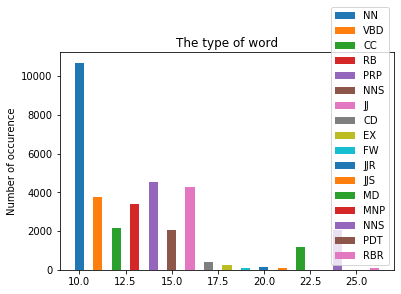

In [58]:
plt.bar(10,NN,0.5, label="NN")
plt.bar(11,VBD,0.5, label="VBD")
plt.bar(12,CC,0.5, label="CC")
plt.bar(13,RB,0.5, label="RB")
plt.bar(14,PRP,0.5, label="PRP")
plt.bar(15,NNS,0.5, label="NNS")
plt.bar(16,JJ,0.5, label="JJ")
plt.bar(17,CD,0.5, label="CD")
plt.bar(18,EX,0.5, label="EX")
plt.bar(19,FW,0.5, label="FW")
plt.bar(20,JJR,0.5, label="JJR")
plt.bar(21,JJS,0.5, label="JJS")
plt.bar(22,MD,0.5, label="MD")
plt.bar(23,NNP,0.5, label="MNP")
plt.bar(24,NNS,0.5, label="NNS")
plt.bar(25,PDT,0.5, label="PDT")
plt.bar(26,RBR,0.5, label="RBR")

plt.legend()
plt.ylabel('Number of occurence')
plt.title('The type of word')
plt.show()

## Division of file in chapterwise text.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt

## Dividing The Book into Chapters

In [60]:
import re

with open('Sherlock.txt', 'r') as file:
    txt = file.readlines()

f = False

for line in txt:
    if re.match("Chapter", line):
        if f: f.close()
        f = open(line + '.txt', 'w')

    else:
        f.write(line + "\n")

In [61]:
files = ['Chapter_1.txt','Chapter_2.txt','Chapter_3.txt','Chapter_4.txt','Chapter_5.txt',
         'Chapter_6.txt','Chapter_7.txt','Chapter_8.txt','Chapter_9.txt','Chapter_10.txt',
         'Chapter_11.txt','Chapter_12.txt','Chapter_13.txt','Chapter_14.txt','Chapter_15.txt']
frames = []

for file in files:
    frames.append(pd.read_csv(file,error_bad_lines=False))
    #data = pd.read_csv('file1.csv', error_bad_lines=False)


df = pd.concat(frames, axis=0)

#df.to_csv('output.txt', sep='\t')

b'Skipping line 47: expected 3 fields, saw 4\nSkipping line 49: expected 3 fields, saw 5\nSkipping line 113: expected 3 fields, saw 5\nSkipping line 197: expected 3 fields, saw 4\nSkipping line 281: expected 3 fields, saw 5\nSkipping line 295: expected 3 fields, saw 4\nSkipping line 309: expected 3 fields, saw 7\nSkipping line 333: expected 3 fields, saw 5\nSkipping line 439: expected 3 fields, saw 4\nSkipping line 455: expected 3 fields, saw 4\nSkipping line 463: expected 3 fields, saw 5\nSkipping line 499: expected 3 fields, saw 4\nSkipping line 509: expected 3 fields, saw 4\nSkipping line 575: expected 3 fields, saw 4\n'
b'Skipping line 49: expected 2 fields, saw 5\nSkipping line 61: expected 2 fields, saw 3\nSkipping line 93: expected 2 fields, saw 3\nSkipping line 103: expected 2 fields, saw 3\nSkipping line 117: expected 2 fields, saw 3\nSkipping line 123: expected 2 fields, saw 3\nSkipping line 147: expected 2 fields, saw 3\nSkipping line 149: expected 2 fields, saw 4\nSkipping 

In [62]:
type(frames)

list

In [63]:
df = pd.DataFrame(frames)

In [64]:
len(df.T)

1

In [65]:
len(df)

15

In [66]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [67]:
len(df)

15

In [68]:
files = ['Chapter_1.txt','Chapter_2.txt','Chapter_3.txt','Chapter_4.txt','Chapter_5.txt',
         'Chapter_6.txt','Chapter_7.txt','Chapter_8.txt','Chapter_9.txt','Chapter_10.txt',
         'Chapter_11.txt','Chapter_12.txt','Chapter_13.txt','Chapter_14.txt','Chapter_15.txt']
data_array =[]
for x in files:
    with open(x, encoding="utf8") as file:
        data = file.read().replace('\n', '')
        data = re.sub('[^a-zA-Z]', ' ', data)
        data = data.lower()
        data_array.append(data)
data_array

['mr  sherlock holmes      mr  sherlock holmes  who was usually very late in the mornings       save upon those not infrequent occasions when he was up all      night  was seated at the breakfast table  i stood upon the      hearth rug and picked up the stick which our visitor had left      behind him the night before  it was a fine  thick piece of wood       bulbous headed  of the sort which is known as a  penang lawyer        just under the head was a broad silver band nearly an inch      across   to james mortimer  m r c s   from his friends of the      c c h    was engraved upon it  with the date         it was just      such a stick as the old fashioned family practitioner used to      carry dignified  solid  and reassuring        well  watson  what do you make of it        holmes was sitting with his back to me  and i had given him no      sign of my occupation        how did you know what i was doing  i believe you have eyes in      the back of your head         i have  at least

## Sentiment analysis Chapterwise

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
i=1
pol=[]
sub=[]
for row in data_array:
    sentence = row
    blob = TextBlob(sentence)
    print("Chapter"+str(i))
    i+=1
    #print(sentence)
    #print(blob.sentiment.polarity)
    pol.append(blob.sentiment.polarity)
    sub.append(blob.sentiment.subjectivity)
print(sub)
pol_arr= np.asarray(pol)

Chapter1
Chapter2
Chapter3
Chapter4
Chapter5
Chapter6
Chapter7
Chapter8
Chapter9
Chapter10
Chapter11
Chapter12
Chapter13
Chapter14
Chapter15
[0.5055491046993512, 0.4525461409579951, 0.5045220380836821, 0.48568851783137534, 0.49274401001432816, 0.4681396044103233, 0.5397876060376066, 0.4727580343317758, 0.5059334652406939, 0.5058934612396153, 0.4853750288173366, 0.46174387781530635, 0.48418954668954733, 0.4865996068857516, 0.5066423378957073]


In [70]:
sub

[0.5055491046993512,
 0.4525461409579951,
 0.5045220380836821,
 0.48568851783137534,
 0.49274401001432816,
 0.4681396044103233,
 0.5397876060376066,
 0.4727580343317758,
 0.5059334652406939,
 0.5058934612396153,
 0.4853750288173366,
 0.46174387781530635,
 0.48418954668954733,
 0.4865996068857516,
 0.5066423378957073]

In [98]:
files

['Chapter_1.txt',
 'Chapter_2.txt',
 'Chapter_3.txt',
 'Chapter_4.txt',
 'Chapter_5.txt',
 'Chapter_6.txt',
 'Chapter_7.txt',
 'Chapter_8.txt',
 'Chapter_9.txt',
 'Chapter_10.txt',
 'Chapter_11.txt',
 'Chapter_12.txt',
 'Chapter_13.txt',
 'Chapter_14.txt',
 'Chapter_15.txt']

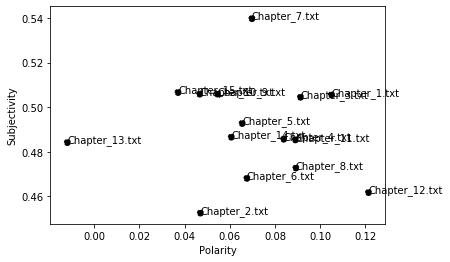

In [111]:
color =['Red','Blue','Green','Yellow','Purple','Black','Magenta','Red','Blue','Green','Yellow','Purple','Black','Magenta']
def myplot():
    fig, ax = plt.subplots()
    for i in range(len(pol)):
        plt.scatter(pol[i],sub[i],ls='--',marker='o',c='Black')
        plt.xlabel("Polarity")
        plt.ylabel("Subjectivity")
    for i, txt in enumerate(files):
        ax.annotate(txt, (pol[i], sub[i]))
myplot()


In [72]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data)

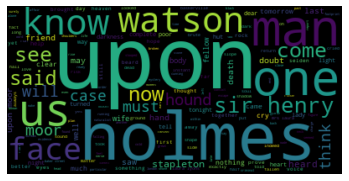

In [73]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
#Word2Vector

In [75]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk

In [76]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramesh0101/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
chpVec=[nltk.word_tokenize(data)]

In [78]:
model=Word2Vec(chpVec,min_count=1,size=1000)

In [79]:
model.most_similar('man')

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('the', 0.8833911418914795),
 ('and', 0.8804038763046265),
 ('of', 0.8764294981956482),
 ('it', 0.8756694793701172),
 ('i', 0.8737761974334717),
 ('a', 0.8734465837478638),
 ('that', 0.8733642101287842),
 ('he', 0.868017852306366),
 ('to', 0.8668006062507629),
 ('is', 0.8635281324386597)]

## Chapter Wise Word Cloud

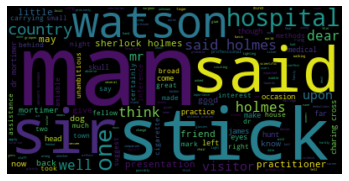

In [80]:
wordcloud = WordCloud().generate(data_array[0]) # Chapter 1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

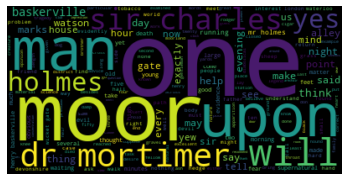

In [81]:
wordcloud = WordCloud().generate(data_array[2]) #chapter 3
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

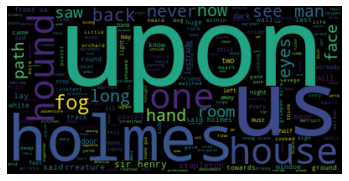

In [82]:
wordcloud = WordCloud().generate(data_array[12]) # chapter 13
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

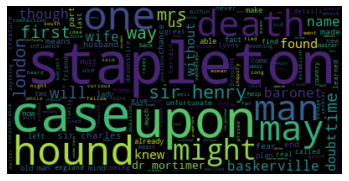

In [83]:
wordcloud = WordCloud().generate(data_array[13]) #chapter 14
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

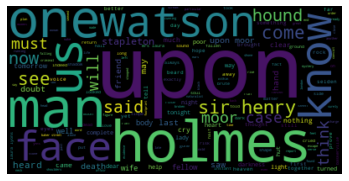

In [84]:
wordcloud = WordCloud().generate(data_array[14]) #chapter 15
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word2Vec

In [85]:
import gensim
import os
import nltk
import pandas as pd
from gensim import corpora, models, similarities, matutils

In [86]:
tokened_data_arr = np.asarray(tokened_data)
tokened_data_arr

array(['chapter', 'mr', 'sherlock', ..., 'way', 'the', 'end'],
      dtype='<U16')

In [87]:
tokened_data_arr_unique = np.unique(tokened_data_arr)

In [88]:
tokened_data_arr_unique = tokened_data_arr_unique.tolist()

In [89]:
tokened_data_arr_unique

['a',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandons',
 'abetting',
 'abhor',
 'abilities',
 'ability',
 'able',
 'abode',
 'abortive',
 'about',
 'above',
 'abreast',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstracted',
 'absurd',
 'abusing',
 'accent',
 'accept',
 'accepted',
 'accessory',
 'accidental',
 'accompany',
 'accomplice',
 'accomplished',
 'accord',
 'accordance',
 'according',
 'account',
 'accounted',
 'accounts',
 'accurate',
 'accurately',
 'accustomed',
 'achievements',
 'acknowledge',
 'acknowledged',
 'acquaintance',
 'acquaintances',
 'acquired',
 'acrid',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activity',
 'acts',
 'actually',
 'acute',
 'add',
 'added',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adhering',
 'adjectives',
 'admirable',
 'admiral',
 'admiration',
 'admission',
 'admit',
 'admitted',
 'ado',
 'adopt',
 'adopted',
 'advance',
 'advances',
 'advantage',
 'a

In [90]:
model = gensim.models.Word2Vec([tokened_data_arr_unique],min_count=1,size=5538)

print(model['sherlock'])
print(model.most_similar('man'))

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


[-6.0335977e-05  2.7693219e-05  6.4938526e-05 ... -7.0597554e-05
  4.1336985e-05  9.0099522e-05]
[('newcomer', 0.04751128703355789), ('sister', 0.043348249047994614), ('earth', 0.042954251170158386), ('strain', 0.040993280708789825), ('it', 0.04085009917616844), ('gig', 0.03983010724186897), ('dusk', 0.039474427700042725), ('lipped', 0.03913966193795204), ('distinct', 0.039060793817043304), ('management', 0.03887995332479477)]


In [91]:
len(tokened_data_arr_unique)

5538

## Word2Vector

In [92]:
from sklearn.decomposition import PCA

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


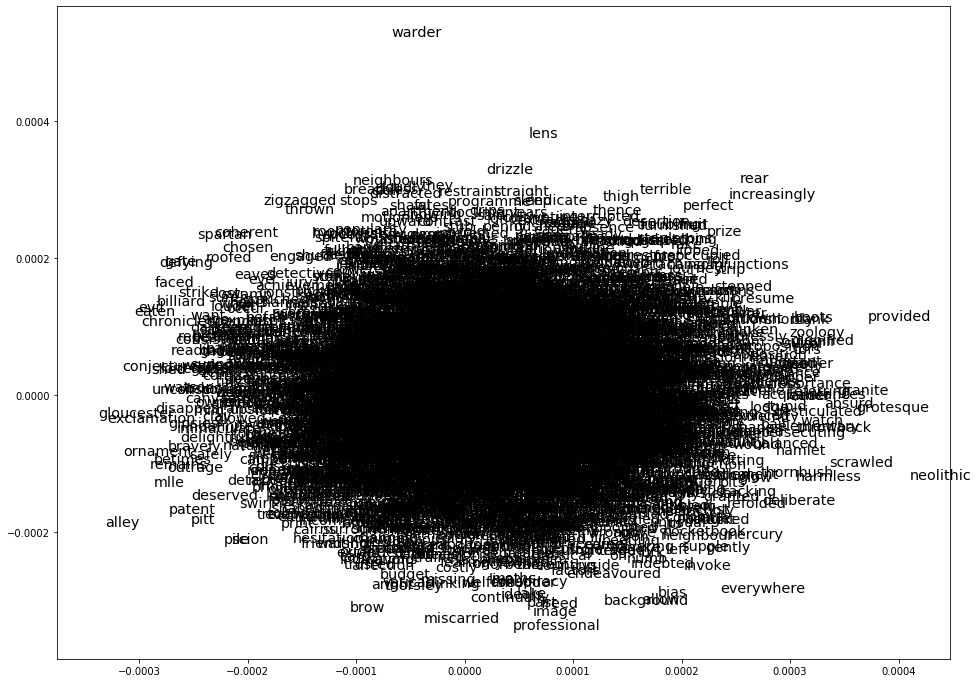

In [93]:
word_vectors = [model[word] for word in tokened_data_arr_unique]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(tokened_data_arr_unique):
    ax.annotate(label, (x[i], y[i]), size='x-large')

## Text files on vector space

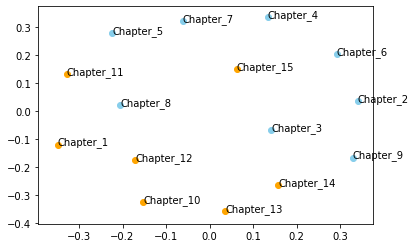

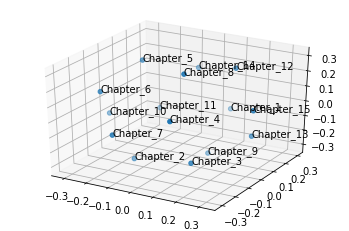

In [94]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='files')               
dtm = vectorizer.fit_transform(files)  # a sparse matrix 

vocab_list = vectorizer.get_feature_names()
vocab_list[1:1010]

files

vocab = np.array(vocab_list)
type(vocab)

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
np.round(dist, 1)

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(dtm)
np.round(dist, 4)

import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

%matplotlib inline
xs, ys = pos[:, 0], pos[:, 1]

names = [os.path.basename(fn).replace('.txt', '') for fn in files]

# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "1" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

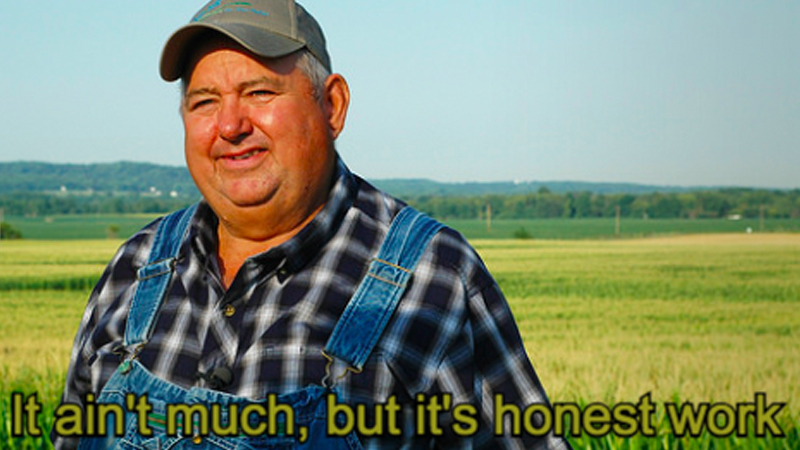

![SegmentLocal](images/sherlock2.gif "segment")

![SegmentLocal](images/sherlock3.gif "segment")